### Last digit of the name in label data is the target label 

In [74]:
import os
print(len(os.listdir('data')))

318


In [73]:
nums = os.listdir('data')
nums = [os.path.splitext(s)[0][-1] for s in nums]
import pandas as pd
nums = pd.DataFrame(nums)
nums.value_counts()

7    43
0    41
3    39
6    37
8    37
9    32
5    31
2    30
4    26
1     2
dtype: int64

In [51]:
from random import randint
print([randint(0,9) for _ in range(50)])

[7, 2, 4, 5, 6, 3, 6, 0, 3, 1, 7, 5, 5, 6, 3, 5, 8, 8, 1, 4, 7, 6, 2, 7, 7, 2, 6, 5, 8, 5, 9, 8, 4, 6, 0, 4, 6, 6, 4, 7, 3, 4, 9, 0, 1, 7, 6, 2, 9, 2]


In [78]:
from utils import *
import cv2
rel_dir = 'raw image'
filename = 'IMG_20230114_0002-1.pdf'

img = cv2.imread(f'{rel_dir}/{filename}')
digits = crop_number(img.copy(), True)

AttributeError: 'NoneType' object has no attribute 'copy'

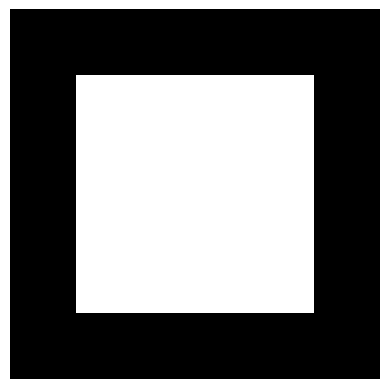

please enter single digit or 'x'
please enter single digit or 'x'
please enter single digit or 'x'
please enter single digit or 'x'
please enter single digit or 'x'


KeyboardInterrupt: Interrupted by user

In [76]:
remaining_digits, labels = manual_label(digits)

In [72]:
save_label_digit(remaining_digits, labels)